<a href="https://colab.research.google.com/github/RenatodaCostaSantos/Machine-Learning---Lessons/blob/main/Supervised%20ML/Decision%20trees%20and%20random%20forests/Lesson_2_Decision_trees_with_Sci_Kit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building decision trees with sci-kit-learn

In the previous lesson, we learned about the nomenclature associated with each part of a decision tree and how it optimally performs splits of the data. We used a very small dataset containing only ten observations and performed the calculations step by step for only one node. The amount of work was huge but the iterations are repetitive and can be automated. We already did it when we built some functions to compute, for example, the optimal thresholds. Sci-kit-learn is a library containing many functions that automate most calculations for us. Now that we know how it performs under the hood, we can use it to build decision trees in a much more efficient way.

We will build decision trees to try to predict the final grade for students, given some features for each student. The [Student Performance dataset](https://archive.ics.uci.edu/ml/datasets/student+performance) can be found at the UCI machine learning repository website.

For this lesson, we will use the following features:

- absences: number of school absences (numeric: from 0 to 93)

- health: current health status (ordinal: ["Very Bad", "Bad", "Regular", "Good", "Very Good"])

- sex: student's sex (binary: 'F' — female, or 'M' — male)

- internet: internet access at home (binary: "yes" or "no")

- Mjob: mother's job (categorical: "teacher," "health" care-related, civil "services" (e.g., administrative or police), "at_home," or "other")

- Fjob: father's job (categorical: "teacher," "health" care-related, civil "services" (e.g., administrative or police), "at_home," or "other")

- guardian: student's guardian (categorical: "mother," "father," or "other")

- Pstatus: parent's cohabitation status (binary: "T" — living together or "A" — apart)

- famrel: quality of family relationships (ordinal: "Very Bad", "Bad", "Regular", "Good", or "Excellent")

Some of the features are categorical and will need to be transformed. The target column "G3" is numerical, making it suitable for regression trees. Later on, we will also perform transformations in the target variable to train and build a classification tree.

Let's import and read the dataset:




In [1]:
import pandas as pd

from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Read dataset
grades = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Decision trees/student-por.csv', sep = ';')

In [3]:
grades.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,Good,3,4,1,1,Regular,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,Excellent,3,3,1,1,Regular,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,Good,3,2,2,3,Regular,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,Regular,2,2,1,1,Very Good,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,Good,3,2,1,2,Very Good,0,11,13,13


In [4]:
# Select just the features of interest
grades = grades[['absences', 'health', 'sex', 'internet', 'Mjob', 'Fjob', 'guardian', 'Pstatus', 'famrel', 'G3']]

In [5]:
grades.head()

,absences,health,sex,internet,Mjob,Fjob,guardian,Pstatus,famrel,G3
0,4,Regular,F,no,at_home,teacher,mother,A,Good,11
1,2,Regular,F,yes,at_home,other,father,T,Excellent,11
2,6,Regular,F,yes,at_home,other,mother,T,Good,12
3,0,Very Good,F,yes,health,services,mother,T,Regular,14
4,0,Very Good,F,no,other,other,father,T,Good,13


In [6]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   absences  649 non-null    int64 
 1   health    649 non-null    object
 2   sex       649 non-null    object
 3   internet  649 non-null    object
 4   Mjob      649 non-null    object
 5   Fjob      649 non-null    object
 6   guardian  649 non-null    object
 7   Pstatus   649 non-null    object
 8   famrel    649 non-null    object
 9   G3        649 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 50.8+ KB


# Preparing the data for machine learning

## Ordinal features

There are no missing values, but most features are categorical and they will have to be transformed for machine learning. To do so, we will use the [OrdinalEnconter](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) tool from sklearn. It will replace ordinal values with numerical ones. We should just be careful to provide the correct order of the labels. There are two ordinal features in the dataset, 'health' and 'famrel'. Let's transform them first:

In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Replace ordinal values with numerical ones for the health feature
ordinal_health = [["Very Bad", "Bad", "Regular", "Good", "Very Good"]]

grades["health"] = OrdinalEncoder(categories = ordinal_health).fit_transform(grades[["health"]])

# Replace ordinal values with numerical ones for the famrel feature
ordinal_famrel = [["Very Bad", "Bad", "Regular", "Good","Excellent"]]

grades["famrel"] = OrdinalEncoder(categories = ordinal_famrel).fit_transform(grades[["famrel"]])

In [8]:
# Check if values were correctly replaced
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  649 non-null    int64  
 1   health    649 non-null    float64
 2   sex       649 non-null    object 
 3   internet  649 non-null    object 
 4   Mjob      649 non-null    object 
 5   Fjob      649 non-null    object 
 6   guardian  649 non-null    object 
 7   Pstatus   649 non-null    object 
 8   famrel    649 non-null    float64
 9   G3        649 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 50.8+ KB


## Categorical features with no hierarchy

The other features are categorical but their values do not follow a hierarchy. We will first replace the binary columns with numerical values 0 and 1. Since 0 means False and 1 means True in pandas, we will also replace the name of the column in order to keep information about our choice. For example, if we choose for the sex feature, 'M' = 0, we will replace the column name with sex_female. There are three binary categorical columns, 'internet', 'sex' and, 'Pstatus'. Let's transform them:

In [9]:
# Replace binary categorical values to numeric for 'sex' feature
grades['sex'].replace({'M': 0, 'F': 1}, inplace = True)

# Rename sex feature
grades.rename(columns = {'sex': 'sex_fem'}, inplace = True)

# Replace binary categorical values to numeric for 'internet' feature
grades['internet'].replace({'no': 0, 'yes': 1}, inplace = True)

# Replace binary categorical values to numeric for 'Pstatus' feature
grades['Pstatus'].replace({'A': 0, 'T': 1}, inplace = True)

# Rename sex feature
grades.rename(columns = {'Pstatus': 'Pstatus_together'}, inplace = True)


In [10]:
grades.head()

,absences,health,sex_fem,internet,Mjob,Fjob,guardian,Pstatus_together,famrel,G3
0,4,2.0,1,0,at_home,teacher,mother,0,3.0,11
1,2,2.0,1,1,at_home,other,father,1,4.0,11
2,6,2.0,1,1,at_home,other,mother,1,3.0,12
3,0,4.0,1,1,health,services,mother,1,2.0,14
4,0,4.0,1,0,other,other,father,1,3.0,13


For multi-class non-ordinal categorical features we will use the get_dummies method from pandas.

In [11]:
# Create dummy variables for the categorical features 'Mjob', 'Fjob' and 'guardian'
grades = pd.get_dummies(data = grades, columns = ['Mjob','Fjob','guardian'], drop_first= True)

In [12]:
grades.head()

,absences,health,sex_fem,internet,Pstatus_together,famrel,G3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_mother,guardian_other
0,4,2.0,1,0,0,3.0,11,0,0,0,0,0,0,0,1,1,0
1,2,2.0,1,1,1,4.0,11,0,0,0,0,0,1,0,0,0,0
2,6,2.0,1,1,1,3.0,12,0,0,0,0,0,1,0,0,1,0
3,0,4.0,1,1,1,2.0,14,1,0,0,0,0,0,1,0,1,0
4,0,4.0,1,0,1,3.0,13,0,1,0,0,0,1,0,0,0,0


Done! Our features are ready for machine learning.

## Transforming the target variable

One last thing before start building our first decision tree with sklearn. We will add a categorical transformation of the 'G3' target column. It will be necessary to create a classification tree later on.

Let's check the single values of the target column:

In [13]:
grades['G3'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64

We will use the six-point grading scheme from the [Academic grading in Portugal](https://en.wikipedia.org/wiki/Academic_grading_in_Portugal). Let's create a column and populate its values using the [mask method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) from pandas.

In [14]:
# Make a copy of the dataframe 
grades_categorical = grades.copy()

# Create a new column. This step is necessary to avoid future warning messages
grades_categorical['grades_cat'] = pd.Series(dtype = 'object')

In [15]:
# Apply the mask method to get values for the new column
grades_categorical['grades_cat'].mask(grades_categorical['G3'] <= 3.4, 'Poor', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 3.4) & (grades_categorical['G3']<= 9.4), 'Weak', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 9.4) & (grades_categorical['G3']<= 13.4), 'Sufficient', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 13.4) & (grades_categorical['G3']<= 15.4), 'Good', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 15.4) & (grades_categorical['G3']<= 17.4), 'Very Good', inplace = True)

grades_categorical['grades_cat'].mask((grades_categorical['G3'] > 17.4) & (grades_categorical['G3']<= 20), 'Excellent', inplace = True)

In [16]:
# Drop the numerical grades column
grades_categorical = grades_categorical.drop('G3', axis = 1)

In [17]:
grades_categorical.head()

,absences,health,sex_fem,internet,Pstatus_together,famrel,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_mother,guardian_other,grades_cat
0,4,2.0,1,0,0,3.0,0,0,0,0,0,0,0,1,1,0,Sufficient
1,2,2.0,1,1,1,4.0,0,0,0,0,0,1,0,0,0,0,Sufficient
2,6,2.0,1,1,1,3.0,0,0,0,0,0,1,0,0,1,0,Sufficient
3,0,4.0,1,1,1,2.0,1,0,0,0,0,0,1,0,1,0,Good
4,0,4.0,1,0,1,3.0,0,1,0,0,0,1,0,0,0,0,Sufficient


We now have two data frames, one suitable for building a regression decision tree and one for building a classification decision tree. 

# Classification tree with sci-kit-learn

The process of creating a decision tree in sci-kit-learn is straightforward. First, we separate the features from the target variable.

In [18]:
# Separate features from target
X = grades_categorical.drop('grades_cat',axis = 1)
y = grades_categorical['grades_cat']

The second step is to split the data into train and test sets.

In [19]:
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle = True, random_state = 34)

Next, we instantiate a regression tree, build it by fitting the training set, and make predictions using the test set.

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate a classification tree
class_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 34)

# Fit the data with the classifier
class_tree.fit(X_train,y_train)

# Make predictions with the model
predictions = class_tree.predict(X_test)

To have an idea of how correct the predictions were, let's compare the first few predictions with the true labels.

In [21]:
# Create a dataframe with the predicted labels and true labels
comparison = pd.DataFrame(data = {'y_test': y_test, 'y_pred' : predictions})

comparison.sample(10, random_state = 24)

,y_test,y_pred
493,Sufficient,Sufficient
491,Weak,Weak
482,Weak,Sufficient
64,Sufficient,Sufficient
81,Weak,Sufficient
501,Sufficient,Sufficient
557,Sufficient,Sufficient
503,Good,Sufficient
606,Excellent,Sufficient
244,Sufficient,Sufficient


In the next lesson, we will learn how to measure if a model is good enough. For the rest of this lesson, we will focus on how to visualize the tree we just created.

# Visualizing a classification decision tree

We will use sklearn and matplotlib to visualize the tree we build.

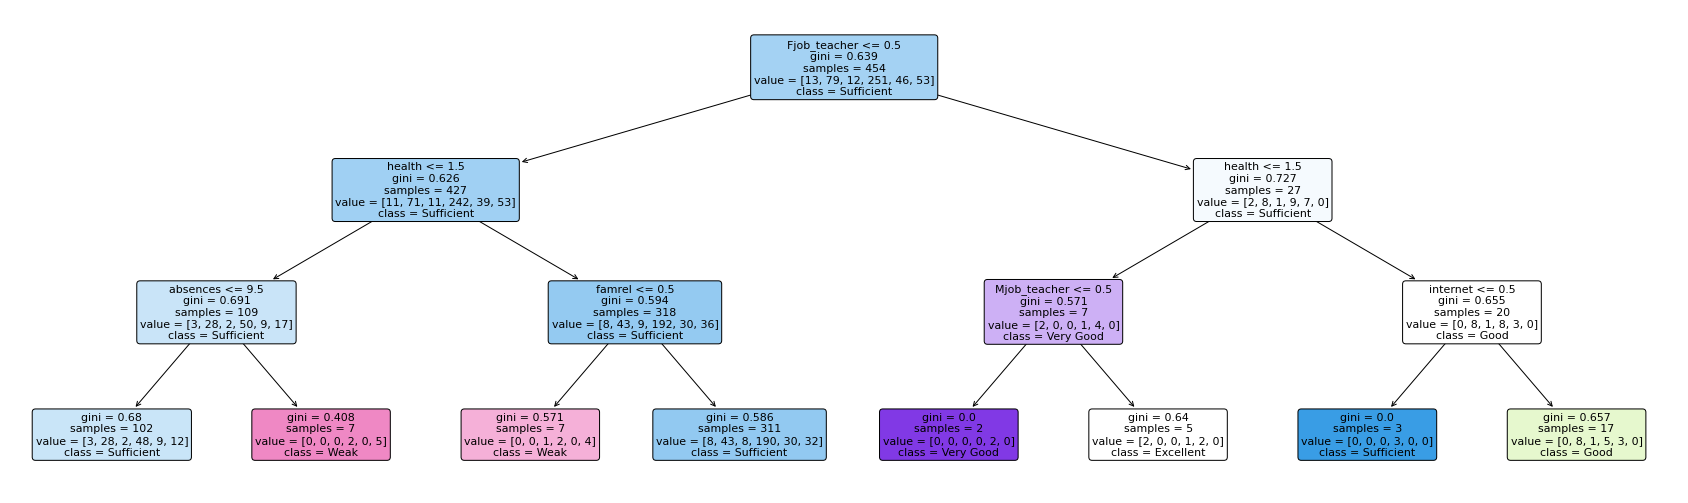

In [22]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
# Configure the size of image for the tree
plt.figure(figsize = [30.0,9.0])

plot_tree(class_tree,
          feature_names = X.columns,
          filled = True,
          proportion = False,
          precision = 3,
          rounded = True,
          fontsize = 11,
          class_names = class_tree.classes_)

plt.show()

The full list of parameters for the plot_tree method can be found in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Some important points about the information displayed above:

- The value of the highest count determines the class displayed in nodes/leaves. 

- To know which class is associated with each number in the value array, we can use the classes_ attribute of the decision tree classifier. In other words, we can use:


In [23]:
print(class_tree.classes_)

['Excellent' 'Good' 'Poor' 'Sufficient' 'Very Good' 'Weak']


- The precision parameter sets the decimal numbers for the gini impurity value.

- The proportion parameter transforms the value of the samples into percentages if its value is True.

- The filled parameter associates a specific color to each class. The dominant class in a node/leaf sets the color for the node/leaf. The intensity of the colors depends on the proportion of the values of the dominant class. For example, the 'Sufficient' class has the color blue associated with it. As the proportion of blue values increases in a split, the node color becomes more intense.

At every step, sklearn calculates the chosen criterion (in our case the Gini impurity) for **all** features before splitting the data and repeats this process for every node. Now that we know how much work goes into one split, we can really appreciate what sci-kit-learn is doing behind the scenes.

# Regression tree with sci-kit-learn

Creating a decision tree for a regression tree is very similar. We only need to change the names of the dataframes and the target column. The steps to follow are the same as for a regression tree.

In [24]:
# Separate features from target
X = grades.drop('G3',axis = 1)
y = grades['G3']

The second step is to split the data into train and test sets.

In [25]:
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle = True, random_state = 34)

Next, we instantiate a regression tree, build it by fitting the training set, and make predictions using the test set.

In [26]:
from sklearn.tree import DecisionTreeRegressor
# Instantiate a regression tree
regression_tree = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3, random_state = 34)

# Fit the data with the regressor
regression_tree.fit(X_train,y_train)

# Make predictions with the model
predictions = regression_tree.predict(X_test)

To have an idea of how well the model performed, let's compare the first few predictions with the true labels.

In [27]:
# Create a dataframe with the predicted labels and true labels
comparison_regressor = pd.DataFrame(data = {'y_test': y_test, 'y_pred' : predictions})

comparison_regressor.sample(10, random_state = 24)

,y_test,y_pred
493,10,11.049020
491,9,12.397661
482,9,11.049020
64,12,12.397661
81,9,11.462185
501,13,11.462185
557,10,12.397661
503,14,12.397661
606,18,12.235294
244,12,12.397661


In the next lesson, we will learn how to measure if a model is good enough. For the rest of this lesson, we will focus on how to visualize the tree we just created.

# Visualizing a regression decision tree

We will use sklearn and matplotlib to visualize the tree we build.

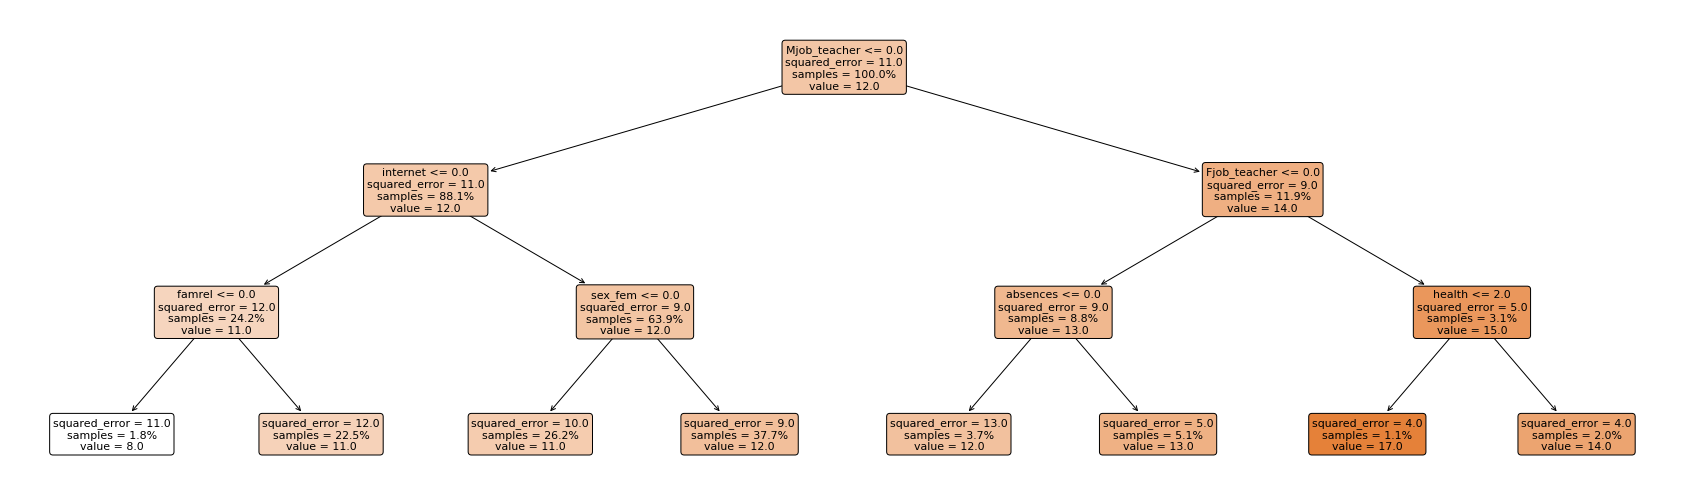

In [28]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
# Configure the size of image for the tree
plt.figure(figsize = [30.0,9.0])

plot_tree(regression_tree,
          feature_names = X.columns,
          filled = True,
          proportion = True,
          precision = 0,
          rounded = True,
          fontsize = 11
          #class_names = class_tree.classes_
          )

plt.show()

The full list of parameters for the plot_tree method can be found in its [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Some important points about the information displayed above:

- The last two parameters are for aesthetics. The rounded parameters display the boxes with rounded corners, while fontsize controls the text size inside the boxes.

- The precision parameter sets the decimal numbers for all values displayed at the node/leaf. Since the target variable includes only integers, we set this parameter to 0.

- The proportion parameter was evaluated to True. That changed the samples' result in the nodes/leaves to a percentage rather than a number.

- The filled parameter fills the nodes/leaves with a color ranging from white to pure orange. The smallest value of the target variable is associated with the white color, while the highest value is with pure orange. The values in between will have intermediate shades.

# Export trees

Before closing this lesson, let's show how we can export the tree in a text report. Sci-kit-learn has a library for that. Let's pratice with it.


In [29]:
from sklearn.tree import export_text

export_tree = export_text(class_tree,
                          feature_names=list(X.columns))

In [30]:
print(export_tree)

|--- Fjob_teacher <= 0.50
|   |--- health <= 1.50
|   |   |--- absences <= 9.50
|   |   |   |--- class: Sufficient
|   |   |--- absences >  9.50
|   |   |   |--- class: Weak
|   |--- health >  1.50
|   |   |--- famrel <= 0.50
|   |   |   |--- class: Weak
|   |   |--- famrel >  0.50
|   |   |   |--- class: Sufficient
|--- Fjob_teacher >  0.50
|   |--- health <= 1.50
|   |   |--- Mjob_teacher <= 0.50
|   |   |   |--- class: Very Good
|   |   |--- Mjob_teacher >  0.50
|   |   |   |--- class: Excellent
|   |--- health >  1.50
|   |   |--- internet <= 0.50
|   |   |   |--- class: Sufficient
|   |   |--- internet >  0.50
|   |   |   |--- class: Good



And there we have it. The vertical lines represent the splits. The horizontal lines connect the splits with the corresponding thresholds.

For a regression tree the structure is the same, but instead of classes we would have numbers. Let's visualize it.

In [31]:
export_tree_regression = export_text(regression_tree,
                            feature_names=list(X.columns))

In [32]:
print(export_tree_regression)

|--- Mjob_teacher <= 0.50
|   |--- internet <= 0.50
|   |   |--- famrel <= 0.50
|   |   |   |--- value: [7.88]
|   |   |--- famrel >  0.50
|   |   |   |--- value: [11.05]
|   |--- internet >  0.50
|   |   |--- sex_fem <= 0.50
|   |   |   |--- value: [11.46]
|   |   |--- sex_fem >  0.50
|   |   |   |--- value: [12.40]
|--- Mjob_teacher >  0.50
|   |--- Fjob_teacher <= 0.50
|   |   |--- absences <= 0.50
|   |   |   |--- value: [12.24]
|   |   |--- absences >  0.50
|   |   |   |--- value: [13.43]
|   |--- Fjob_teacher >  0.50
|   |   |--- health <= 1.50
|   |   |   |--- value: [16.80]
|   |   |--- health >  1.50
|   |   |   |--- value: [14.33]



# Summary

In this lesson, we learned:

- How to prepare ordinal and non-ordinal data for machine learning.

- How to build a regression and classification decision tree with sci-kit-learn.

- How to visualize and export a decision tree with matplotlib and sci-kit-learn.